## Random Forest Modeling

In [1]:
!pip install numpy
!pip install pandas
!pip install warnings
!pip install sklearn
!pip install statsmodels
!pip install matplotlib
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# import random undersampling and other necessary libraries 
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("InsuranceData.csv")
print(df.shape)
print(df.head())

(7626, 16)
   Unnamed: 0 SIU_CUST_YN  SEX  AGE FP_CAREER  OCCP_GRP  TOTALPREM  \
0           0           N    2    4         N         1         14   
1           1           N    1    6         N        11          2   
2           2           N    1    5         Y         2         15   
3           3           N    1    5         N        17         13   
4           4           N    1    5         N         1          3   

   MAIN_INSR_AMT_SUM  WORK_YEARS_MIN  EXPR_COUNT  DMND_AMT_SUM  CLAIM_CNT  \
0          120266433               0           8        141450          4   
1            5000000               1           1       1390000          3   
2         1797991770               1          24       2480000         10   
3          212274240               1           6         72320          1   
4           75256800              13           4       1300000          4   

   TOTAL_VLID_HOSP_OTDA  HOSP_VARIES  HOSP_DVSN_VARIES  CHME_LICE_COUNT  
0                     5        

## N : 0 / Y : 1 의 각각 비율 확인

In [ ]:
df.SIU_CUST_YN.value_counts()
#대략 10 : 1

N    6901
Y     725
Name: SIU_CUST_YN, dtype: int64

N    90.49305
Y     9.50695
Name: SIU_CUST_YN, dtype: float64


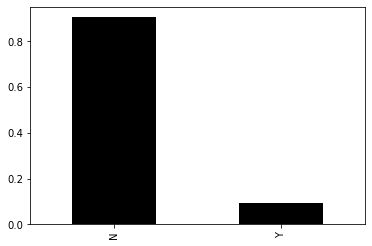

In [ ]:
df.SIU_CUST_YN.value_counts(normalize=True).plot(kind='bar', color = "black")
print(df.SIU_CUST_YN.value_counts(normalize=True)*100)

## 데이터 추가정제

데이터에 맞춰서 하나만 실행

In [ ]:
#insurance data

df['SIU_CUST_YN'].replace('N', 0, inplace = True)
df['SIU_CUST_YN'].replace('Y', 1, inplace = True)
df['FP_CAREER'].replace('N', 0, inplace = True)
df['FP_CAREER'].replace('Y', 1, inplace = True)
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.drop(['TOTALPREM'], axis=1, inplace = True)

In [ ]:
X = df.iloc[:,1:] # SIU_CUST_YN을 제외한 모든 cloumn
y = df.iloc[:,0] # SIU_CUST_YN

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
# 트레이닝 데이터, 테스트 데이터 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# 현재 트레이닝 데이터 확인
print("Before Sampling: ",Counter(y_train))

Before Sampling:  Counter({0: 4839, 1: 499})


## OverSampling Test Module

In [ ]:
from imblearn.over_sampling import SMOTE
# OverSampling 방법(SMOTE)
SMOTE = SMOTE()
# OverSampling 실행
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
# OverSampling 결과 데이터 확인
print("Before Sampling: ",Counter(y_train))
print("After oversampling(SMOTE): ",Counter(y_train_SMOTE))

Before Sampling:  Counter({0: 4839, 1: 499})
After oversampling(SMOTE):  Counter({0: 4839, 1: 4839})


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
# OverSampling 방법(BSMOTE)
BSMOTE = BorderlineSMOTE()
# OverSampling 실행
X_train_BSMOTE, y_train_BSMOTE = BSMOTE.fit_resample(X_train, y_train)
# OverSampling 결과 데이터 확인
print("Before Sampling: ",Counter(y_train))
print("After oversampling(BSMOTE)): ",Counter(y_train_BSMOTE))

Before Sampling:  Counter({0: 4839, 1: 499})
After oversampling(BSMOTE)):  Counter({0: 4839, 1: 4839})


In [ ]:
from imblearn.over_sampling import ADASYN
# OverSampling 방법(ADASYN)
ADASYN = ADASYN()
# OverSampling 실행
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)
# OverSampling 결과 데이터 확인
print("Before Sampling: ",Counter(y_train))
print("After oversampling(ADASYN): ",Counter(y_train_ADASYN))

Before Sampling:  Counter({0: 4839, 1: 499})
After oversampling(ADASYN):  Counter({0: 4839, 1: 4824})


In [ ]:
from imblearn.over_sampling import SVMSMOTE
# OverSampling 방법(SVMSMOTE)
SVMSMOTE = SVMSMOTE()
X_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE.fit_resample(X_train, y_train)
print("Before Sampling: ",Counter(y_train))
print("After oversampling(ADASYN): ",Counter(y_train_SVMSMOTE))

Before Sampling:  Counter({0: 4839, 1: 499})
After oversampling(ADASYN):  Counter({0: 4839, 1: 4839})


## Sampling 방식 선택

In [ ]:
# 해당 변수를 설정해서 Sampling 방식 선택 후 머신러닝 실행
X_train_sampling = X_train_SVMSMOTE
y_train_sampling = y_train_SVMSMOTE

## 결과 확인

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sampling = scaler.fit_transform(X_train_sampling)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# 학습 진행
model = RandomForestClassifier(n_estimators=100, random_state = 42)#생성할 트리 갯수, 서로 다른 방향으로 트리를 만들어 overfitting 양을 줄일 수 있음
model.fit(X_train_sampling, y_train_sampling)

RandomForestClassifier(random_state=42)

In [ ]:
# sklearn에서 제공하는 score값
print(model.score(X_test, y_test))

0.9038461538461539


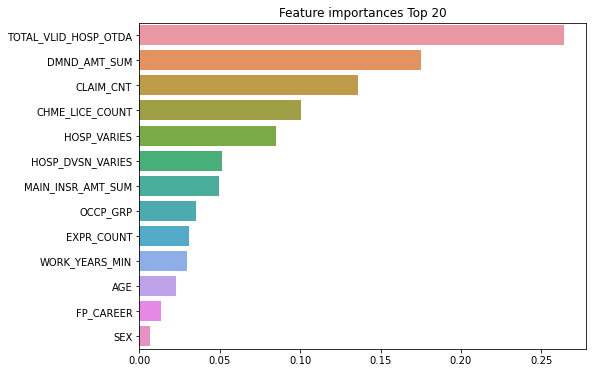

In [ ]:
# 각 속성별 w중요도
import seaborn as sns
importances_values = model.feature_importances_

importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [ ]:
print(model.predict(X_test))

[0 0 0 ... 0 0 0]


In [ ]:
predict_X = model.predict(X_test)

In [ ]:
print(model.predict_proba(X_test))

[[0.7  0.3 ]
 [1.   0.  ]
 [0.88 0.12]
 ...
 [0.96 0.04]
 [0.98 0.02]
 [0.99 0.01]]


In [ ]:
# 비중.
persentage = 0.55

In [ ]:
# 몇 %까지를 0으로 할건지 판단.

sample_result = model.predict_proba(X_test)[:,0]
list_test_model = [i for i in sample_result]
list_test_model
for i in range(len(list_test_model)):
    if list_test_model[i] >=persentage:
        list_test_model[i] = 0
    else:
        list_test_model[i] = 1


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

print('Persentage : %.2f' % persentage)
print('list test model result')
print("---------------------------")
print('accuracy: %.2f' % accuracy_score(y_test, list_test_model))
print('precision: %.2f' % precision_score(y_test, list_test_model))
print('recall: %.2f' % recall_score(y_test, list_test_model))
print('F1: %.2f' % f1_score(y_test, list_test_model))
print("---------------------------")
print("")
print('Persentage : 0.5')
print('Just result')
print("---------------------------")
print('accuracy: %.2f' % accuracy_score(y_test, predict_X))
print('precision: %.2f' % precision_score(y_test, predict_X))
print('recall: %.2f' % recall_score(y_test, predict_X))
print('F1: %.2f' % f1_score(y_test, predict_X))

Persentage : 0.55
list test model result
---------------------------
accuracy: 0.89
precision: 0.46
recall: 0.59
F1: 0.51
---------------------------

Persentage : 0.5
Just result
---------------------------
accuracy: 0.90
precision: 0.51
recall: 0.57
F1: 0.54


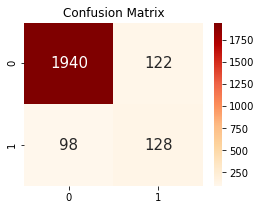

In [ ]:
import seaborn as sns
confusion = confusion_matrix(y_true = y_test
                             , y_pred = predict_X)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import seaborn as sns
confusion = confusion_matrix(y_true = y_test
                             , y_pred = list_test_model)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()